In [5]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('ecommerece data.csv')
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mamoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mamoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Brand,Sentiment,Text
0,1,Walmart,Positive,Highly recommend this seller.
1,2,Ebay,Neutral,Excellent value for money.
2,3,Amazon,Neutral,Highly recommend this seller.
3,4,Walmart,Neutral,Satisfied with the purchase.
4,5,Ebay,Neutral,Satisfied with the purchase.


In [8]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens
df['Processed_Text'] = df['Text'].apply(preprocess_text)
df.to_csv('preprocessed_data.csv', index=False)
df = pd.read_csv('preprocessed_data.csv')
df.head()


,Id,Brand,Sentiment,Text,Processed_Text
0,1,Walmart,Positive,Highly recommend this seller.,"['highly', 'recommend', 'seller']"
1,2,Ebay,Neutral,Excellent value for money.,"['excellent', 'value', 'money']"
2,3,Amazon,Neutral,Highly recommend this seller.,"['highly', 'recommend', 'seller']"
3,4,Walmart,Neutral,Satisfied with the purchase.,"['satisfied', 'purchase']"
4,5,Ebay,Neutral,Satisfied with the purchase.,"['satisfied', 'purchase']"


In [9]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')
df = pd.read_csv('preprocessed_data.csv')
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)
df.to_csv('vader_sentiment_analysis.csv', index=False)
df = pd.read_csv('vader_sentiment_analysis.csv')
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mamoo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Id,Brand,Sentiment,Text,Processed_Text,VADER_Sentiment
0,1,Walmart,Positive,Highly recommend this seller.,"['highly', 'recommend', 'seller']",Positive
1,2,Ebay,Neutral,Excellent value for money.,"['excellent', 'value', 'money']",Positive
2,3,Amazon,Neutral,Highly recommend this seller.,"['highly', 'recommend', 'seller']",Positive
3,4,Walmart,Neutral,Satisfied with the purchase.,"['satisfied', 'purchase']",Positive
4,5,Ebay,Neutral,Satisfied with the purchase.,"['satisfied', 'purchase']",Positive


Note: you may need to restart the kernel to use updated packages.


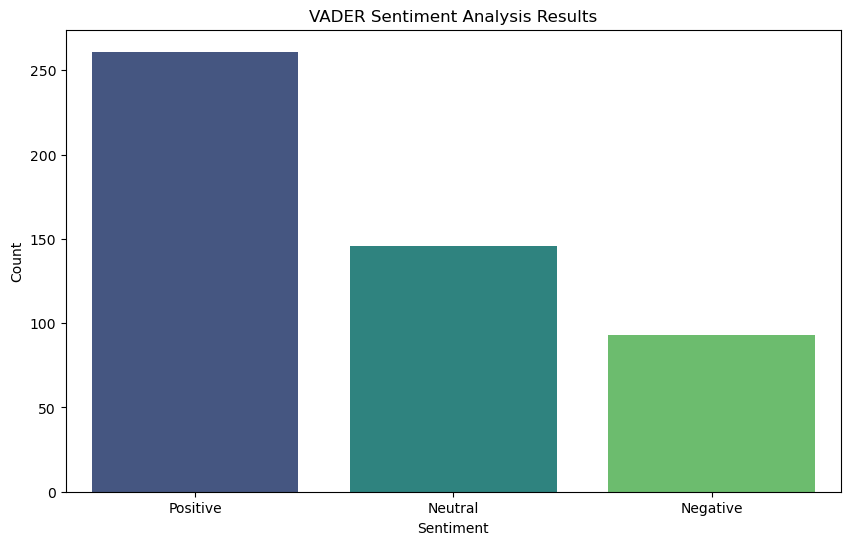

In [15]:
# sentiment_visualization.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_vader = pd.read_csv('vader_sentiment_analysis.csv')
plt.figure(figsize=(10, 6))
sns.countplot(x='VADER_Sentiment', data=df_vader, palette='viridis')
plt.title('VADER Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
